In [1]:
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
df = pd.read_excel("data.xlsx", sheet_name=None, header=0)

In [3]:
all_df = {}
for i, d in enumerate(df.items()):
    name, data = d
    all_df[name] = data

In [4]:
data = all_df['1K-01']
data_test = all_df['1X-02']

In [5]:
data = data[data['DEPTH'] == data["DEPTH"]]   # drop NaN value row
data_test = data_test[data_test['DEPTH'] == data_test["DEPTH"]]   # drop NaN value row

In [6]:
data = data.drop(["Core_Facies"], axis=1)
data_test = data_test.drop(["Core_Facies"], axis=1)

In [7]:
data['Log_Facies'].apply(lambda x: str(x)).describe()

count     1025
unique       3
top        1.0
freq       530
Name: Log_Facies, dtype: object

In [8]:
data['Label'] = data['Log_Facies'].apply(lambda x: str(x))
facies_labels = list(set(data['Label']))
facies_color_map = {}
facies_colors = ['blue', 'red', 'yellow']
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [9]:
comb = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
def label_facies(row):
    f = row['Fluid']
    lf = row['Log_Facies']
    return comb.index((f, lf))
data['MixLabel'] = data.apply(label_facies, axis=1)
data_test['MixLabel'] = data_test.apply(label_facies, axis=1)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


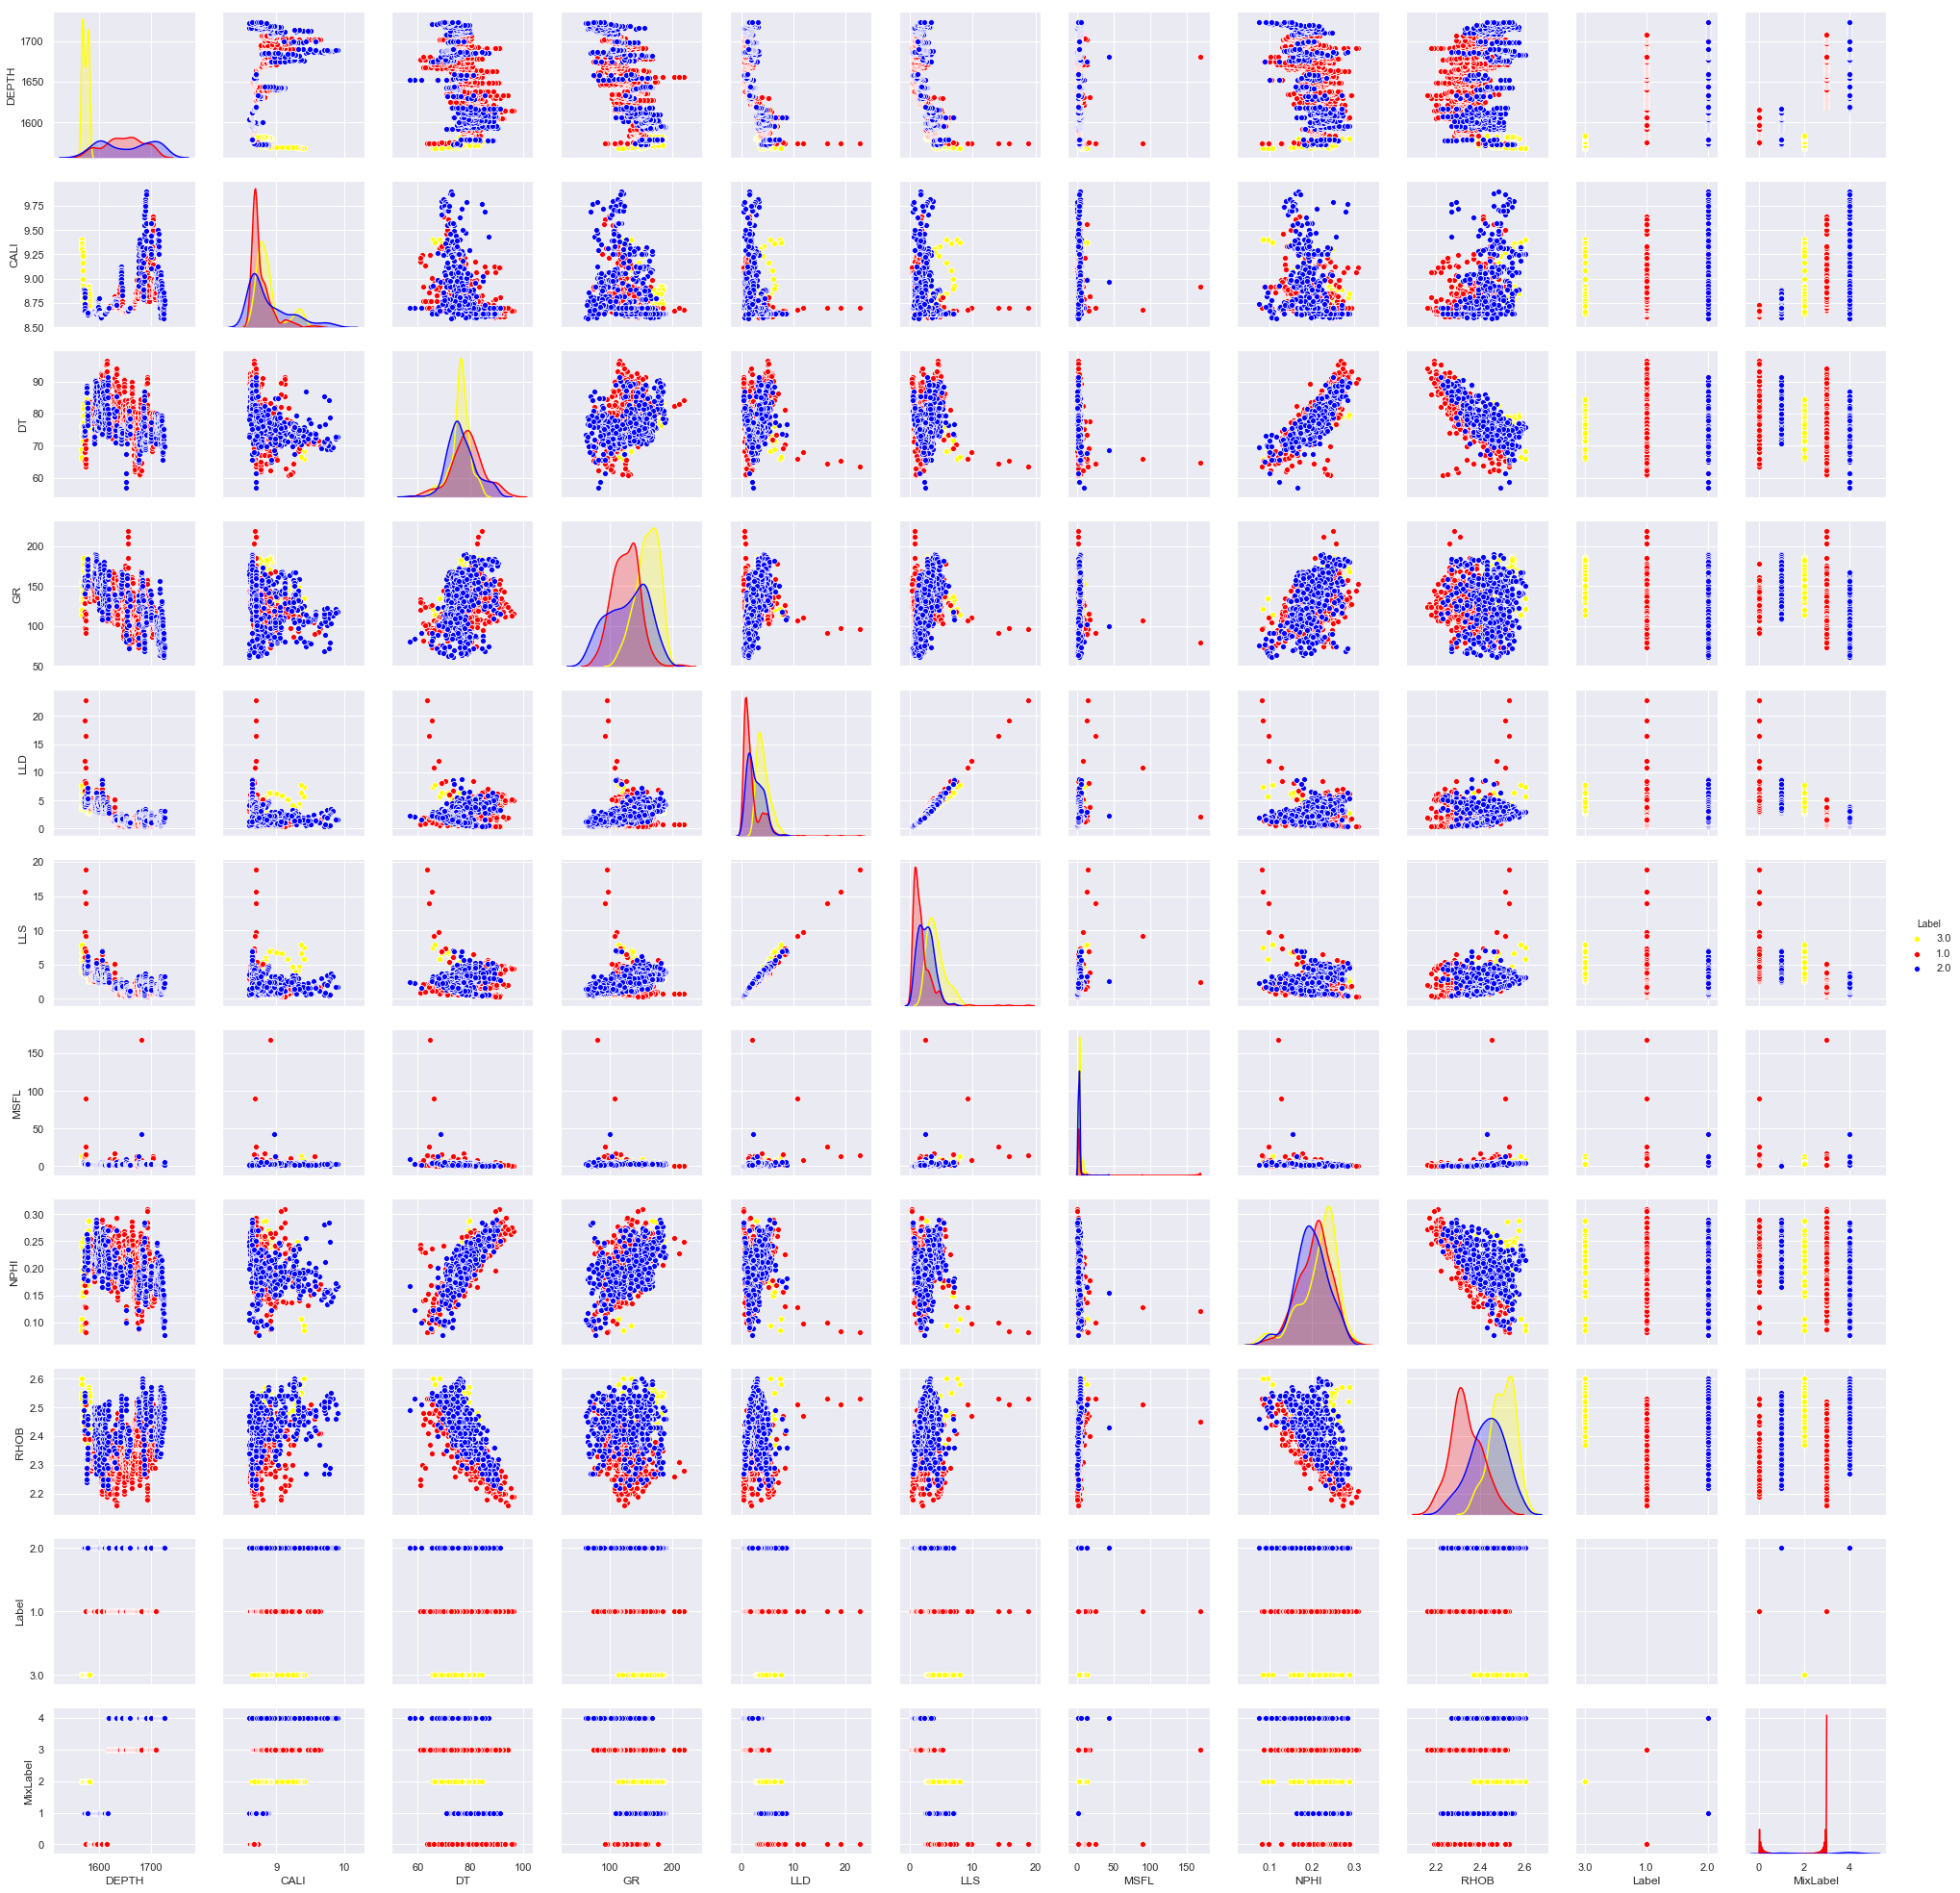

In [10]:
import seaborn as sns
sns.set()
sns.pairplot(data.drop(['Fluid', 'Log_Facies'], axis=1),
         palette=facies_color_map,  hue='Label',
             hue_order=list(reversed(facies_labels)))

In [11]:
facies_labels = ['A', 'B', 'C']
def label_facies(row):
    return facies_labels[int(row)-1]
data['Label'] = data['Log_Facies'].apply(label_facies)

facies_labels = ['A', 'B', 'C']
facies_color_map = {}
facies_colors = ['blue', 'red', 'yellow']
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

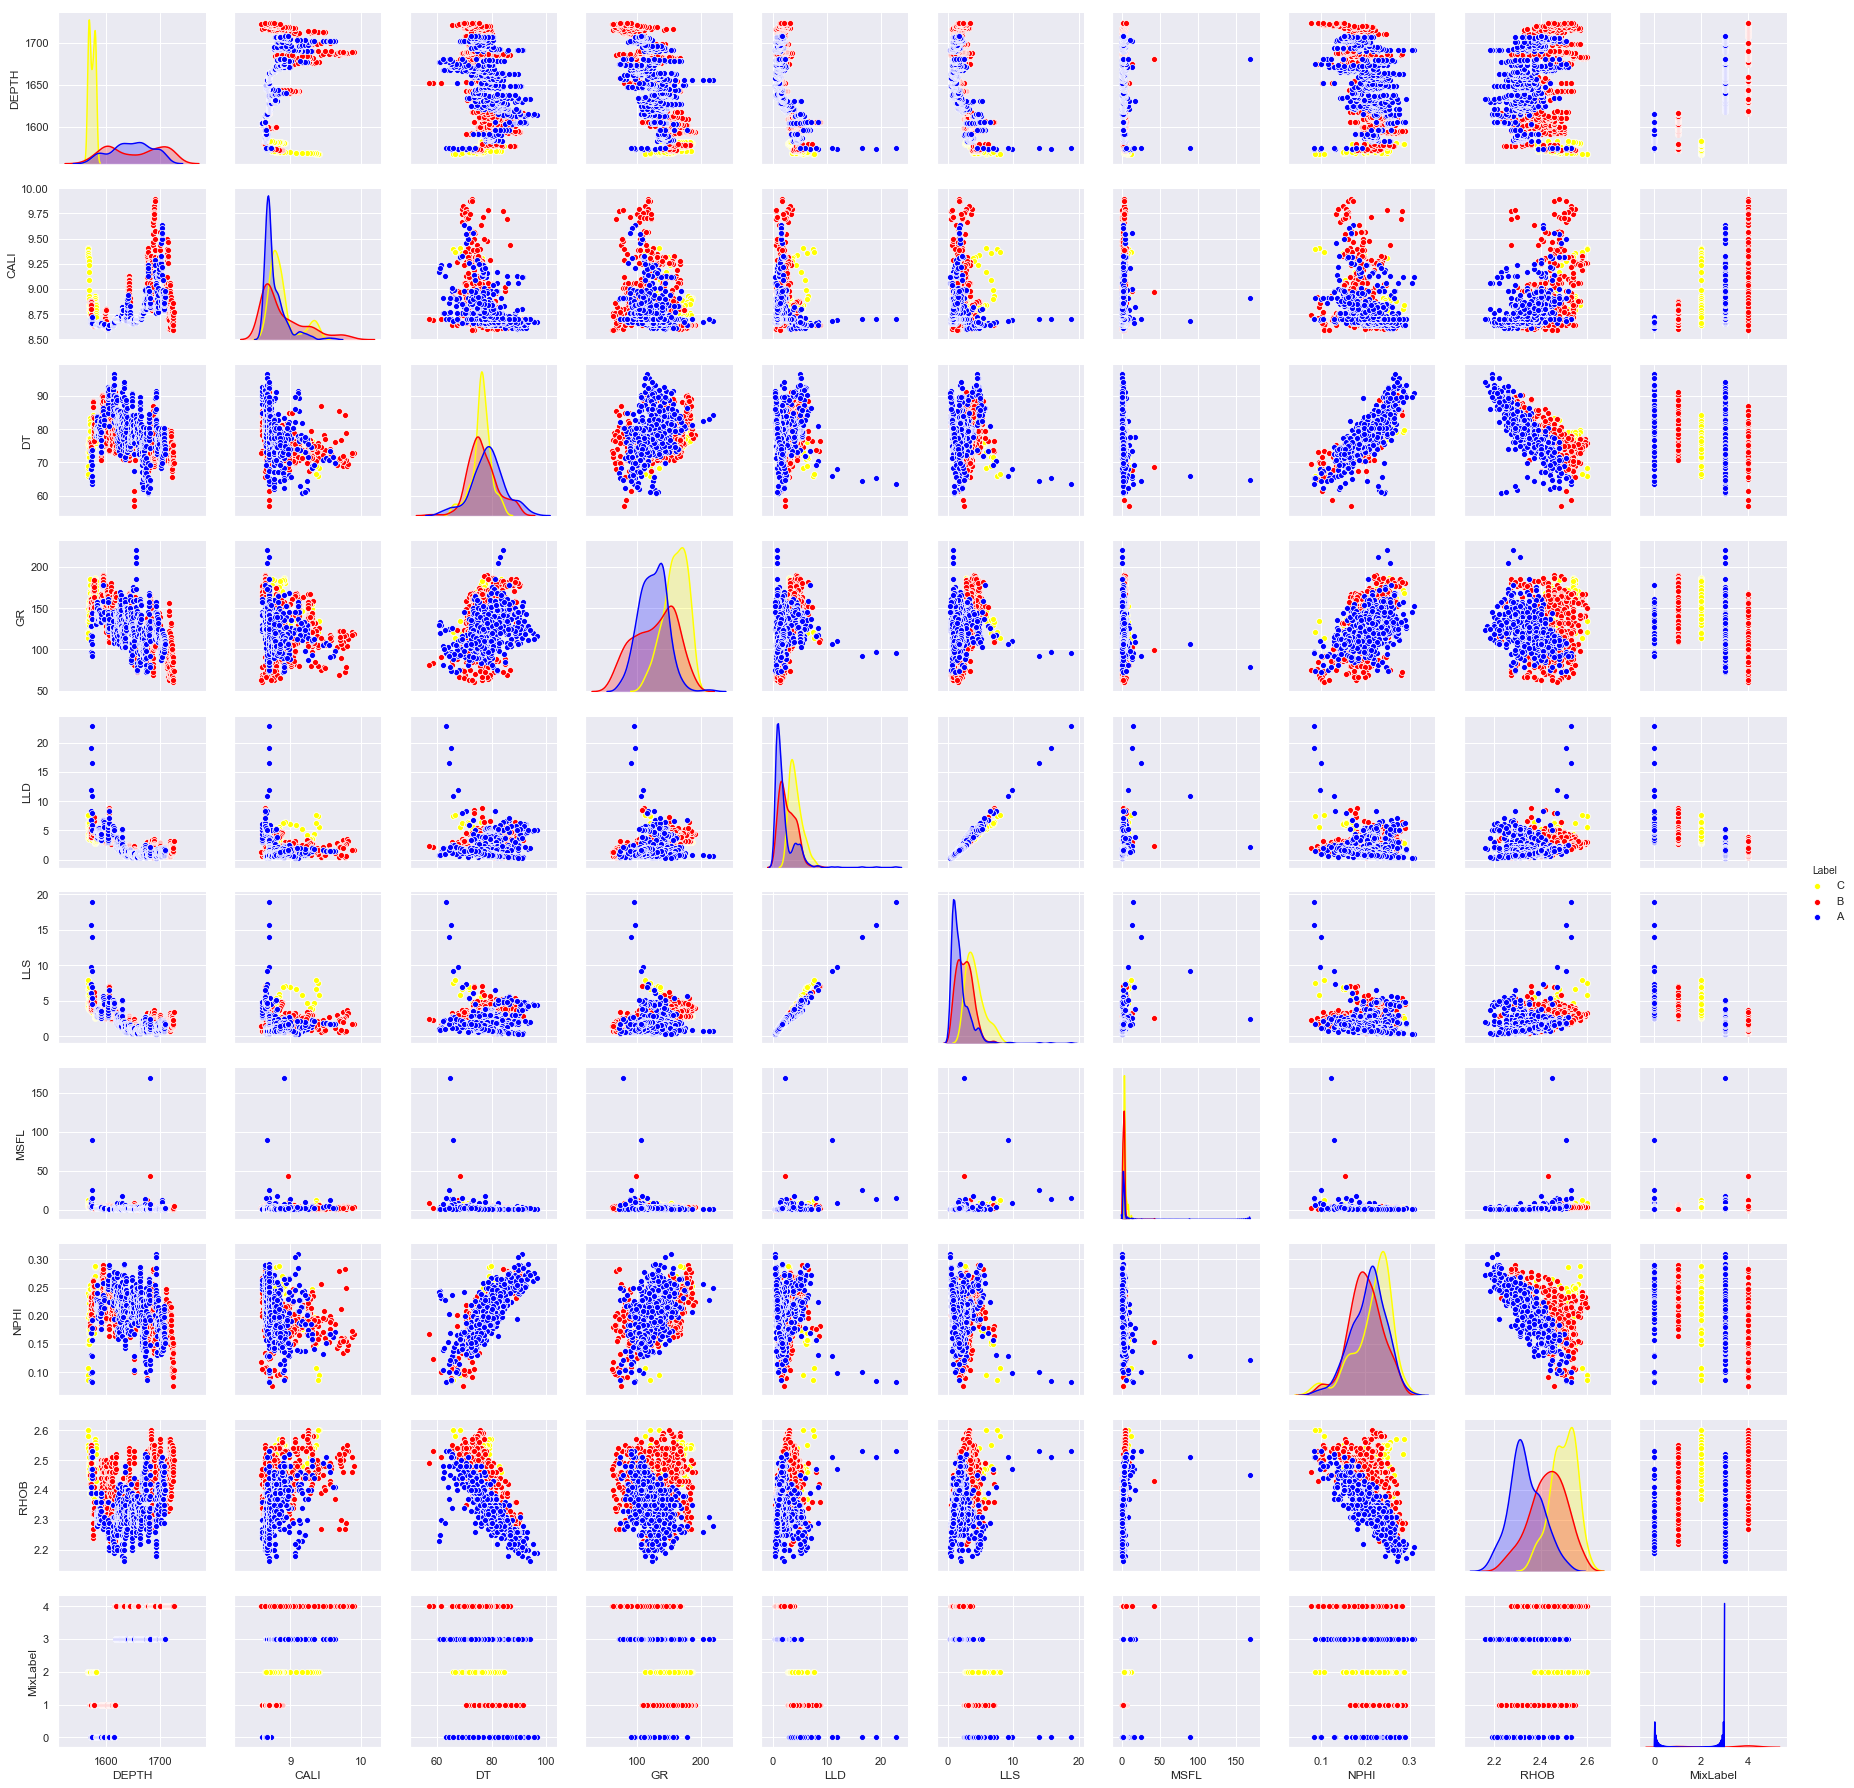

In [12]:
import seaborn as sns
sns.set()
sns.pairplot(data.drop(['Log_Facies','Fluid'],axis=1),
         palette=facies_color_map, hue='Label',
             hue_order=list(reversed(facies_labels)))

## L R

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
ss = StandardScaler()
X = ss.fit_transform(X)
X_real = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]

In [15]:
Y = data['Log_Facies'].apply(lambda x: int(x)-1)
Y_test = data_test['Log_Facies'].apply(lambda x: int(x)-1)

In [16]:
clf = LogisticRegression()
clf_real = LogisticRegression()

In [17]:
clf.fit(X, Y)
clf_real.fit(X_real, Y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
Y_pred = clf.predict(X)
Y_real_pred = clf.predict(X_real)

In [19]:
from sklearn.metrics import confusion_matrix 

In [20]:
results = confusion_matrix(Y, Y_pred)
results

array([[474,  55,   1],
       [121, 303,   7],
       [  2,  19,  43]])

In [21]:
results_real = confusion_matrix(Y, Y_real_pred)
results_real

array([[  0, 530,   0],
       [  0, 431,   0],
       [  0,  64,   0]])

In [22]:
count = Y_pred[Y_pred==Y].shape[0]
count, count/Y_pred.shape[0]

(820, 0.8)

In [23]:
from sklearn.metrics import classification_report
report = classification_report(Y, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       530
           1       0.80      0.70      0.75       431
           2       0.84      0.67      0.75        64

   micro avg       0.80      0.80      0.80      1025
   macro avg       0.81      0.76      0.78      1025
weighted avg       0.80      0.80      0.80      1025



In [24]:
print(clf.intercept_)
print(clf.coef_)

[-0.23088812 -0.38637902 -5.331887  ]
[[ 0.06540731 -0.20490059 -0.99202325  0.27874922  1.01387764 -1.51442859
   1.15717478 -1.24748841 -3.56451337]
 [ 1.13719754 -0.03029435  0.6867362   0.05459472  0.9444873  -0.12385016
  -0.68960912  0.41124826  1.68873727]
 [-3.2547469   1.09666476  0.09938329  0.08917029 -1.33224463  0.83745061
   0.0253272   0.24571485  1.03975919]]


In [25]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,-1.730362,2.306744,-1.625579,0.184157,1.644088,2.147442,0.639834,-2.810846,2.333416
1,-1.726982,2.270341,-2.039429,-0.291137,2.569787,3.203858,0.904577,-3.048645,2.333416
2,-1.723603,2.147380,-1.933838,-0.564103,2.709775,3.510379,1.556352,-2.509123,2.113879
3,-1.720223,2.112999,-1.508066,-0.329775,2.007702,2.672763,0.879523,-1.414737,1.784573
4,-1.716843,2.020778,-0.826831,0.174761,0.987844,1.501520,0.569493,-0.189945,1.674804
5,-1.713464,1.928557,-0.390841,0.710098,0.650843,1.101567,0.327473,0.914669,1.674804
6,-1.710084,1.894176,-0.230751,0.942938,0.516688,0.971178,0.077340,1.114113,1.565035
7,-1.706705,1.765956,-0.251188,0.957812,0.576631,1.043526,0.045723,0.791934,1.345497
8,-1.703325,1.606996,-0.549228,0.831524,0.893061,1.450004,0.181887,-0.028855,1.125960
9,-1.699945,1.325074,-0.859190,0.604344,1.392027,2.163693,0.194438,-0.714125,1.016191


In [26]:
Y_binary = data['Log_Facies'].apply(lambda x: 1 if int(x)==1 else 0)
clf_binary = LogisticRegression()
clf_binary.fit(X, Y_binary)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
print(clf_binary.intercept_)
print(clf_binary.coef_)

[-0.23088812]
[[ 0.06540731 -0.20490059 -0.99202325  0.27874922  1.01387764 -1.51442859
   1.15717478 -1.24748841 -3.56451337]]


## Last five

In [28]:
X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
ss = StandardScaler()
X = ss.fit_transform(X)
# X = X[:,-4:]
X = np.delete(X, 4, axis=1)

In [29]:
# clf = LogisticRegression(fit_intercept=False)
clf = LogisticRegression()
clf.fit(X, Y)
Y_pred = clf.predict(X)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
count = Y_pred[Y_pred==Y].shape[0]
count, count/Y_pred.shape[0]

(819, 0.7990243902439025)

In [31]:
print(clf.coef_)
print(clf.intercept_)


[[-1.89477520e-03 -2.28430300e-01 -9.90551036e-01  2.55811921e-01
  -5.31691961e-01  1.12930441e+00 -1.25279107e+00 -3.63759555e+00]
 [ 1.10821412e+00 -7.23614345e-02  6.90838991e-01  4.72860202e-02
   7.77874330e-01 -7.42385150e-01  4.19951942e-01  1.63864129e+00]
 [-3.25575260e+00  1.30242284e+00  1.37444302e-01  1.79846961e-01
  -2.01084013e-01 -4.58630947e-02  2.37229601e-01  1.10604393e+00]]
[-0.23006749 -0.39442671 -5.58464308]


In [32]:
results = confusion_matrix(Y, Y_pred)
results

array([[475,  54,   1],
       [122, 302,   7],
       [  4,  18,  42]])

## Square

In [33]:
X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]

In [34]:
X_np = X.values

In [35]:
X_np_square = X_np ** 2

In [36]:
X_np_square = X_np_square[:,1:]

In [37]:
X_all = np.hstack([X_np, X_np_square])

In [38]:
columns = list(X.columns)
columns_pow_2 = [c+"_pow2" for c in columns]
columns_pow_2.pop(0)
columns.extend(columns_pow_2)
# columns.pop(9)
X_all_df = pd.DataFrame(X_all, columns=columns)

In [39]:
X_all_df

,DEPTH,CALI,DT,GR,LLD,LLS,MSFL,NPHI,RHOB,CALI_pow2,DT_pow2,GR_pow2,LLD_pow2,LLS_pow2,MSFL_pow2,NPHI_pow2,RHOB_pow2
0,1567.8912,9.4067,68.31,134.2510,5.6598,5.7639,6.9362,0.0948,2.60,88.486005,4666.2561,18023.331001,32.033336,33.222543,48.110870,0.008987,6.7600
1,1568.0436,9.3977,65.88,121.1500,7.4373,7.4475,8.5941,0.0855,2.60,88.316765,4340.1744,14677.322500,55.313431,55.465256,73.858555,0.007310,6.7600
2,1568.1960,9.3673,66.50,113.6260,7.7061,7.9360,12.6757,0.1066,2.58,87.746309,4422.2500,12910.867876,59.383977,62.980096,160.673370,0.011364,6.6564
3,1568.3484,9.3588,69.00,120.0850,6.3580,6.6011,8.4372,0.1494,2.55,87.587137,4761.0000,14420.407225,40.424164,43.574521,71.186344,0.022320,6.5025
4,1568.5008,9.3360,73.00,133.9920,4.3997,4.7345,6.4957,0.1973,2.54,87.160896,5329.0000,17953.856064,19.357360,22.415490,42.194118,0.038927,6.4516
5,1568.6532,9.3132,75.56,148.7480,3.7526,4.0971,4.9801,0.2405,2.54,86.735694,5709.3136,22125.967504,14.082007,16.786228,24.801396,0.057840,6.4516
6,1568.8056,9.3047,76.50,155.1660,3.4950,3.8893,3.4137,0.2483,2.53,86.577442,5852.2500,24076.487556,12.215025,15.126654,11.653348,0.061653,6.4009
7,1568.9580,9.2730,76.38,155.5760,3.6101,4.0046,3.2157,0.2357,2.51,85.988529,5833.9044,24203.891776,13.032822,16.036821,10.340726,0.055554,6.3001
8,1569.1104,9.2337,74.63,152.0950,4.2177,4.6524,4.0684,0.2036,2.49,85.261216,5569.6369,23132.889025,17.788993,21.644826,16.551879,0.041453,6.2001
9,1569.2628,9.1640,72.81,145.8330,5.1758,5.7898,4.1470,0.1768,2.48,83.978896,5301.2961,21267.263889,26.788906,33.521784,17.197609,0.031258,6.1504


In [40]:
ss = StandardScaler()
X = ss.fit_transform(X_all_df.values)


In [41]:
clf = LogisticRegression()

In [42]:
clf.fit(X, Y)
Y_pred = clf.predict(X)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
results = confusion_matrix(Y, Y_pred)
results

array([[479,  51,   0],
       [110, 313,   8],
       [  1,  13,  50]])

In [44]:
from sklearn.metrics import classification_report
report = classification_report(Y, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       530
           1       0.83      0.73      0.77       431
           2       0.86      0.78      0.82        64

   micro avg       0.82      0.82      0.82      1025
   macro avg       0.83      0.80      0.82      1025
weighted avg       0.82      0.82      0.82      1025



In [45]:
print(clf.coef_)
print(clf.intercept_)

[[-0.18285122  0.09594398 -0.99751088  2.91630974  0.01037673 -1.54560583
   1.02337668 -1.34874101 -1.81209409 -0.33568032  0.21292892 -2.73671326
   1.20891021 -0.16780242 -0.76280943  0.09215321 -1.48802644]
 [ 1.45455376 -0.66452988  0.39472604 -1.92191209  1.68297355  1.12492423
  -0.44923293  1.56422006  1.26498572  0.67276313  0.13080009  1.94029512
  -0.79355274 -1.72384497  0.27609147 -1.22698969  0.01864236]
 [-3.21409257  0.61949158  0.10360387 -0.19737512 -1.18997028  0.45794526
   0.23038563 -0.04755602  0.51511624  0.43638761 -0.07435737  0.29221493
  -0.72957798  0.88994848 -0.35521364  0.36360323  0.47342582]]
[-0.28834253 -0.457498   -5.27209174]


In [46]:
pd.DataFrame(X, columns=X_all_df.columns)

,DEPTH,CALI,DT,GR,LLD,LLS,MSFL,NPHI,RHOB,CALI_pow2,DT_pow2,GR_pow2,LLD_pow2,LLS_pow2,MSFL_pow2,NPHI_pow2,RHOB_pow2
0,-1.730362,2.306744,-1.625579,0.184157,1.644088,2.147442,0.639834,-2.810846,2.333416,2.306749,-1.552930,0.080973,0.906338,1.475626,0.000340,-2.211027,2.413564
1,-1.726982,2.270341,-2.039429,-0.291137,2.569787,3.203858,0.904577,-3.048645,2.333416,2.269004,-1.907141,-0.388260,1.861855,2.778089,0.028260,-2.318625,2.413564
2,-1.723603,2.147380,-1.933838,-0.564103,2.709775,3.510379,1.556352,-2.509123,2.113879,2.141777,-1.817986,-0.635982,2.028928,3.218135,0.122402,-2.058527,2.175857
3,-1.720223,2.112999,-1.508066,-0.329775,2.007702,2.672763,0.879523,-1.414737,1.784573,2.106278,-1.450013,-0.424289,1.250734,2.081805,0.025363,-1.355438,1.822739
4,-1.716843,2.020778,-0.826831,0.174761,0.987844,1.501520,0.569493,-0.189945,1.674804,2.011214,-0.833015,0.071230,0.386061,0.842798,-0.006076,-0.289785,1.705950
5,-1.713464,1.928557,-0.390841,0.710098,0.650843,1.101567,0.327473,0.914669,1.674804,1.916383,-0.419894,0.656313,0.169537,0.513167,-0.024937,0.923844,1.705950
6,-1.710084,1.894176,-0.230751,0.942938,0.516688,0.971178,0.077340,1.114113,1.565035,1.881088,-0.264627,0.929848,0.092908,0.415987,-0.039195,1.168498,1.589621
7,-1.706705,1.765956,-0.251188,0.957812,0.576631,1.043526,0.045723,0.791934,1.345497,1.749745,-0.284555,0.947715,0.126474,0.469284,-0.040618,0.777169,1.358338
8,-1.703325,1.606996,-0.549228,0.831524,0.893061,1.450004,0.181887,-0.028855,1.125960,1.587534,-0.571620,0.797521,0.321688,0.797671,-0.033883,-0.127715,1.128891
9,-1.699945,1.325074,-0.859190,0.604344,1.392027,2.163693,0.194438,-0.714125,1.016191,1.301542,-0.863109,0.535892,0.691084,1.493148,-0.033182,-0.781902,1.014856


In [47]:
Y_pred[Y_pred==Y].shape

(842,)

In [48]:
Y_pred.shape

(1025,)

In [49]:
842/1025

0.8214634146341463

## Multi Power

In [50]:
def multi_power(power):
    X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
    X_np = X.values
    a = [X_np]
    for i in range(-3, power+1):
        if i in [0, 1]:
            continue
        X_np_square = X_np ** i
        X_np_square = X_np_square[:,1:]
        a.append(X_np_square)
    X_all = np.hstack(a)
    print(i, X_all.shape)
    ss = StandardScaler()
    X = ss.fit_transform(X_all)
    clf = LogisticRegression()
    clf.fit(X, Y)
    Y_pred = clf.predict(X)
    
    X = data_test[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
    X_np = X.values
    a = [X_np]
    for i in range(-3, power+1):
        if i in [0, 1]:
            continue
        X_np_square = X_np ** i
        X_np_square = X_np_square[:,1:]
        a.append(X_np_square)
    X_all = np.hstack(a)
    X = ss.fit_transform(X_all)
    Y_pred = clf.predict(X)
#     Y_pred[Y_pred==Y_test].shape[0]
    return Y_pred[Y_pred==Y_test].shape[0], power, clf, ss

In [51]:
result = [multi_power(i) for i in range(-3, 20)]

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


-3 (1025, 17)
-2 (1025, 25)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

-1 (1025, 33)
0 (1025, 33)
1 (1025, 33)
2 (1025, 41)
3 (1025, 49)
4 (1025, 57)
5 (1025, 65)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

6 (1025, 73)
7 (1025, 81)
8 (1025, 89)
9 (1025, 97)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

10 (1025, 105)
11 (1025, 113)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


12 (1025, 121)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


13 (1025, 129)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


14 (1025, 137)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


15 (1025, 145)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


16 (1025, 153)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


17 (1025, 161)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


18 (1025, 169)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


19 (1025, 177)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
881/Y_pred.shape[0]

0.8595121951219512

In [53]:
result

[(824,
  -3,
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 (828,
  -2,
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 (841,
  -1,
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  StandardScaler(cop

In [54]:
tmp, power, clf, ss = multi_power(8)

8 (1025, 89)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [55]:
X = data_test[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
X_np = X.values
a = [X_np]
power = 8
for i in range(-3, power+1):
    if i in [0, 1]:
        continue
    X_np_square = X_np ** i
    X_np_square = X_np_square[:,1:]
    a.append(X_np_square)
X_all = np.hstack(a)
X = ss.fit_transform(X_all)
Y_pred = clf.predict(X)
Y_pred[Y_pred==Y_test].shape[0]

826

In [56]:
Y_test.shape[0]

1094

In [57]:
828/1094

0.7568555758683729

In [58]:
y = [i[0] for i in result]
x = [i[1] for i in result]

In [59]:
print(y)
print(x)

[824, 828, 841, 841, 841, 866, 862, 857, 849, 840, 834, 826, 821, 818, 811, 814, 811, 811, 817, 819, 822, 824, 823]
[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


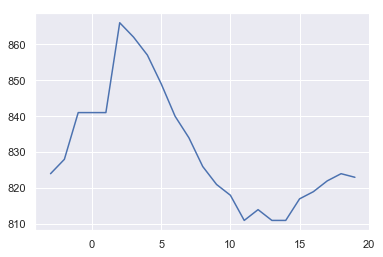

In [60]:
plt.plot(x, y)

In [61]:
current = -20
r = [current]
while current < 20:
    current+=0.5
    r.append(current)
def multi_power_only_one(power):
    X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
    X_np = X.values
    a = [X_np]

    X_np_square = X_np ** power
    X_np_square = X_np_square[:,1:]
    a.append(X_np_square)
    X_all = np.hstack(a)
    print(i, X_all.shape)
    ss = StandardScaler()
    X = ss.fit_transform(X_all)
    clf = LogisticRegression()
    clf.fit(X, Y)
    Y_pred = clf.predict(X)
    
    X = data_test[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
    X_np = X.values
    a = [X_np]
    
    X_np_square = X_np ** power
    X_np_square = X_np_square[:,1:]
    a.append(X_np_square)
    X_all = np.hstack(a)
    X = ss.fit_transform(X_all)
    Y_pred = clf.predict(X)
#     Y_pred[Y_pred==Y_test].shape[0]
    return Y_pred[Y_pred==Y_test].shape[0], power, clf, ss

In [62]:
result = [multi_power_only_one(i) for i in r]

8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)
8 (1025, 17)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [63]:
y = [i[0] for i in result]
x = [i[1] for i in result]
print(y)
print(x)

[799, 800, 802, 803, 802, 801, 801, 803, 803, 805, 805, 807, 807, 809, 810, 814, 814, 815, 817, 817, 818, 820, 820, 818, 821, 821, 820, 819, 816, 815, 816, 818, 819, 821, 824, 831, 828, 829, 831, 841, 794, 837, 788, 836, 838, 822, 818, 815, 818, 823, 816, 814, 810, 808, 807, 803, 803, 800, 799, 797, 794, 794, 792, 791, 789, 790, 789, 788, 788, 785, 781, 780, 780, 777, 774, 774, 771, 770, 769, 769, 767]
[-20, -19.5, -19.0, -18.5, -18.0, -17.5, -17.0, -16.5, -16.0, -15.5, -15.0, -14.5, -14.0, -13.5, -13.0, -12.5, -12.0, -11.5, -11.0, -10.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]


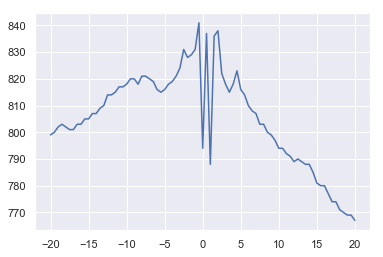

In [64]:
plt.plot(x, y)

In [65]:
from pprint import pprint
for i, c in enumerate(x):
    print(x[i], y[i])

-20 799
-19.5 800
-19.0 802
-18.5 803
-18.0 802
-17.5 801
-17.0 801
-16.5 803
-16.0 803
-15.5 805
-15.0 805
-14.5 807
-14.0 807
-13.5 809
-13.0 810
-12.5 814
-12.0 814
-11.5 815
-11.0 817
-10.5 817
-10.0 818
-9.5 820
-9.0 820
-8.5 818
-8.0 821
-7.5 821
-7.0 820
-6.5 819
-6.0 816
-5.5 815
-5.0 816
-4.5 818
-4.0 819
-3.5 821
-3.0 824
-2.5 831
-2.0 828
-1.5 829
-1.0 831
-0.5 841
0.0 794
0.5 837
1.0 788
1.5 836
2.0 838
2.5 822
3.0 818
3.5 815
4.0 818
4.5 823
5.0 816
5.5 814
6.0 810
6.5 808
7.0 807
7.5 803
8.0 803
8.5 800
9.0 799
9.5 797
10.0 794
10.5 794
11.0 792
11.5 791
12.0 789
12.5 790
13.0 789
13.5 788
14.0 788
14.5 785
15.0 781
15.5 780
16.0 780
16.5 777
17.0 774
17.5 774
18.0 771
18.5 770
19.0 769
19.5 769
20.0 767


In [66]:
current = -2.5
r_2 = [current]
while current < 2.5:
    current+=0.5
    r_2.append(current)
r_2.remove(0)
r_2.remove(1)
r_2
def multi_power_fixed(power):
    X = data[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
    X_np = X.values
    a = [X_np]
    for i in r_2:
        if i in [0, 1]:
            continue
        X_np_square = X_np ** i
        X_np_square = X_np_square[:,1:]
        a.append(X_np_square)
    X_all = np.hstack(a)
    print(i, X_all.shape)
    ss = StandardScaler()
    X = ss.fit_transform(X_all)
    clf = LogisticRegression()
    clf.fit(X, Y)
    Y_pred = clf.predict(X)
    
    X = data_test[["DEPTH", "CALI", "DT", "GR", "LLD", "LLS", "MSFL", "NPHI", "RHOB"]]
    X_np = X.values
    a = [X_np]
    for i in r_2:
        if i in [0, 1]:
            continue
        X_np_square = X_np ** i
        X_np_square = X_np_square[:,1:]
        a.append(X_np_square)
    X_all = np.hstack(a)
    X = ss.fit_transform(X_all)
    Y_pred = clf.predict(X)
#     Y_pred[Y_pred==Y_test].shape[0]
    return Y_pred[Y_pred==Y_test].shape[0], power, clf, ss

In [67]:
multi_power_fixed(9999)

2.5 (1025, 81)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(870,
 9999,
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 StandardScaler(copy=True, with_mean=True, with_std=True))

# MMMMMM

In [68]:
column1 = 'Log_Facies'
column2 = 'MixLabel'
column3 = 'Fluid'
Y = data[column1].apply(lambda x: int(x)-1)
Y_test = data_test[column1].apply(lambda x: int(x)-1)

In [69]:
Y_test.value_counts()

0    724
1    325
2     45
Name: Log_Facies, dtype: int64

In [70]:
for c in [column1, column2, column3]:
    Y = data[c].apply(lambda x: int(x)-1)
    Y_test = data_test[c].apply(lambda x: int(x)-1)
    count, _, _, _ = multi_power_fixed(9999)
    print(c, count)

2.5 (1025, 81)
Log_Facies 870
2.5 (1025, 81)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


MixLabel 837
2.5 (1025, 81)
Fluid 1072


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
